# Module 3 Part 1:  Distribution of Random Variables

# Table of Contents


This module consists of 2 parts:

**Part 1** - Distribution of Random Variables

**Part 2** - Probability Density Functions and the Central Limit Theorem

Each part is provided in a separate notebook file. It is recommended that you follow the order
of the notebooks.



Part 1:

* [Introduction](#introduction)


* [Learning Outcomes](#Learning_Outcomes)
    

* [Readings and Resources](#Readings_and_Resources)


* [Definitions](#Definitions)


* [Probability Distribution Function (PDF) for a Discrete Random Variable](#Probability_Distribution_Function_for_a_Discrete_Random_Variable)
    * [Measures of distributions](#Measures_of_distributions)
    * [Uniform distribution](#Uniform_distribution)
    * [Bernoulli distribution](#Bernoulli_distribution)
    * [Geometric distribution](#Geometric_distribution)
    * [Binomial distribution](#Binomial_distribution)
    * [Poisson distribution](#Poisson_distribution)

Part 2:

* Probability Density Functions (PDF) for a Continous Random Variables
    * Uniform distribution (for continuous variables)
    * The normal distribution
    

* Central Limit Theorem



<a id='introduction'></a>
# Introduction

This module covers the most common probability distributions. The importance of the normal distribution is given by the central limit theorem (CLT).

<a id='Learning_Outcomes'></a>
# Learning Outcomes

In this module you will understand when each of the following distributions are applied and prepare the path to make inferences using these distributions.

Probability distributions for discrete variables:

* Uniform
* Bernoulli
* Geometric
* Binomial
* Poisson

Probability distributions for continuous variables
* Uniform
* Normal

The importance of the normal distribution is given by the 
* Central limit theorem


<a id='Readings_and_Resources'></a>
# Readings and Resources

We invite you to further supplement this notebook with the following recommended texts:

Diez, D., Barr, C. & Çetinkaya-Rundel, M. (2017). Chapter 3: Distributions of random variables *OpenIntro Statistics (3rd Ed.).* https://www.openintro.org/stat/textbook.php?stat_book=os


OpenStax College. (2018). Chapters 4: Discrete Random Variables, Chapter 5: Continous Random Variables, and Chapter 6:  The Normal Distribution. Introductory statistics. *OpenStax CNX. * https://openstax.org/details/introductory-statistics


<a id='Definitions'></a>
# Definitions

**Probability:** *A mathematical tool used to study randomness*. It deals with the chance (the likelihood) of an event occurring.

**Variable:** Usually noted with capital letters such as $X$ and $Y$, *a variable is a characteristic or measurement that can be determined for each member of a population*. Variables may be numerical or categorical.

*	**Numerical variables** take on values with equal units such as weight in pounds and time in hours.
*	**Categorical variables** are items that can be placed into categories.

**Deterministic Experiment:** An experiment that, when repeated, will always have the same outcome. For example, if you determine the eye colour of an individual, repeating the experiment will always result in the same colour.

**Probabilistic or Stochastic Experiment:** A probabilistic experiment has an unknown or uncertain outcome. For example, if you count the number of ducks on a lake at a specific moment, or the number of members of a randomly chosen family.

**Random variable:** The outcome of a probabilistic experiment. It can also be thought of as a function or rule that assigns a number to each outcome of a probabilistic experiment. Although the outcome of a probabilistic experiment is unknown, it cannot take just any value. Further, the probability of each possible value can be determined. When using notation associated with a random variable, upper case letters such as $X$ or $Y$ denote the definition of the random variable, and lower case letters like $x$ or $y$ denote the value of a random variable. If $X$ is a random variable, then $X$ is written in words and $x$ is given as a number. For example, if we measure 12 apples: $X =$ “number of apples”; $x = 12$.
*	**Discrete random variable:** A random variable that can take on a countable number of values. For example, if we define $X$ as the number of heads observed in an experiment that flips a coin 10 times. 
*	**Continuous random variable:** A random variable whose values are uncountable, and can take any value within a range; usually obtained by measuring. Measurements of time, height, weight, and distance are all examples of continuous random variables.

**Probability distribution:** A table, formula, or graph that describes the values of a random variable and the probability associated with these values. In this module, we will expand on probability distributions for both discrete and continuous variables.


**Example**

**Python**, like many other languages, can simulate random experiments. The experiment can yield an unknown value; however, each possible value has a determined probability.

In this case we will sample 1000 M&Ms and show the resulting frequency table, frequency distribution, and probability distribution.

In [1]:
#Import libraries
import random
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from IPython.display import display, HTML

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.4)

In [2]:
# Define Possible Outcomes (sample space)
colours = ["Brown", "Yellow", "Red", "Green", "Orange", "Tan"]

# Assign a probability to every possible outcome. Note that
# the total should add to one
probs = [0.3, 0.2, 0.2, 0.1, 0.1, 0.1]

# Set initial counts to zero
m_and_ms = {"Brown": 0, "Yellow": 0, "Red": 0, "Green": 0, "Orange": 0, "Tan": 0}

# Simulation:  select colours randomly as per the predetermined probabilities
for counter in range(1000):
    colour = np.random.choice(colours, p=probs)
    m_and_ms[colour] += 1

# Create a dict for reporting
m_and_ms_df = pd.DataFrame.from_dict(m_and_ms, orient="index")
m_and_ms_df.columns = ["Count"]
m_and_ms_df

,Count
Brown,330
Yellow,201
Red,187
Green,85
Orange,108
Tan,89


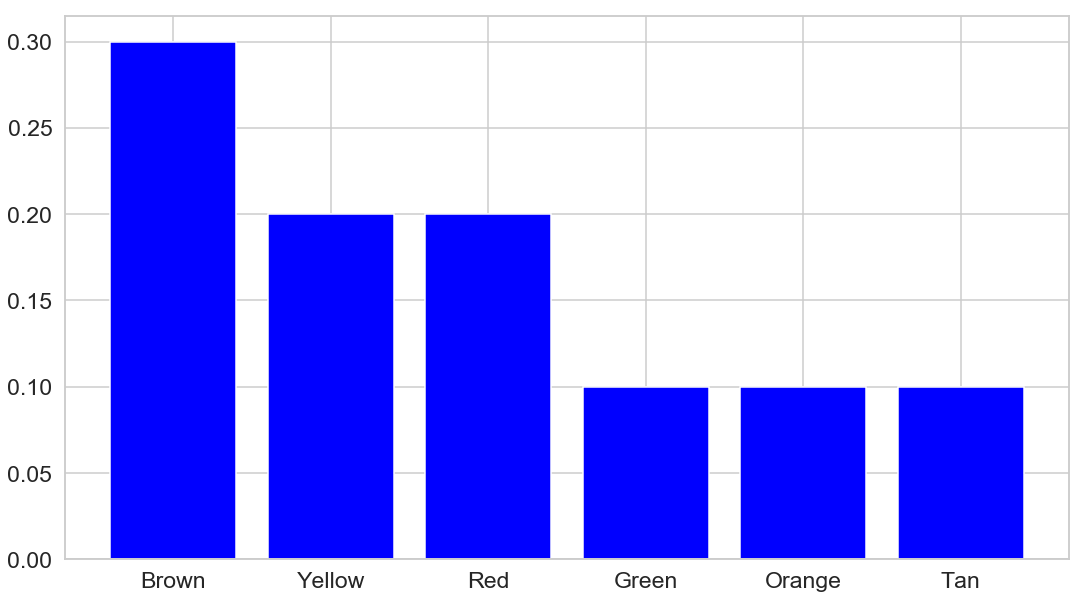

In [3]:
# Plot probabiilties
plt.figure(figsize=(18,10))
plt.bar(np.arange(6),probs,color="blue")
plt.xticks(np.arange(6), colours)
plt.show()

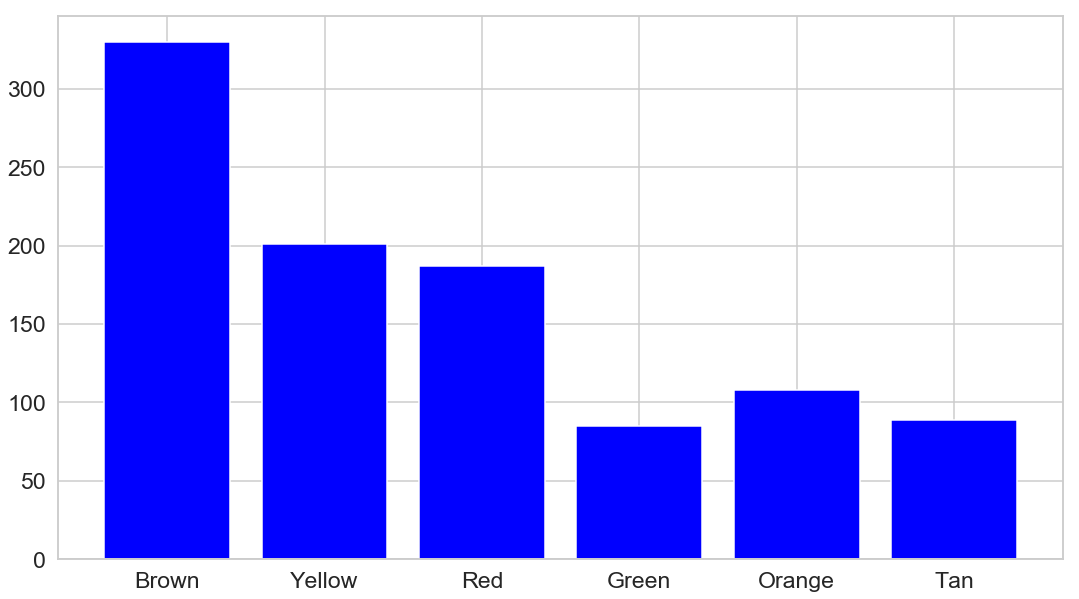

In [4]:
# Plot the frequencies obtained via the simulation.
# Note that because of the randomness of the process, the frequencies do not
# exactly match the probabilities
frequency = m_and_ms_df["Count"]
plt.figure(figsize=(18,10))
plt.bar(np.arange(6),frequency,color="blue")
plt.xticks(np.arange(6), colours)
plt.show()

**Note:** the relative heights of the bars are not the same.  We simulated drawing 1000 M&Ms; the frequencies will match the theoretical probabilities, but they will never be exactly the same.

<a id='Probability_Distribution_Function_for_a_Discrete_Random_Variable'></a>
# Probability distribution function (PDF) for a discrete random variable

In simple terms, a PDF assigns a probability to each possible value of a discrete random variable. The requirements of a PDF are equivalent to the rules that apply to probabilities:
 
 * The domain of $P$ must be the set of all possible states of $x$ (exhaustive). $P$ is defined for all ($\forall$) $x$ that are included ($\subset$) in $X$.  Using set notation this is expressed as:

<center> $P$ is defined $\forall x \subset X$</center>



 *  Each probability is between zero and one, inclusive. 

<center> $0\leqq P(x) \leqq 1$     $\forall x \subset X$</center>

 * The sum of the probabilities is one.

<center>$\sum_{\substack{x \subset X}} P(x) =1$</center>


If we follow the frequentist definition explained in the previous module, we can count the frequency of each possible outcome after a large enough number of trials to create a frequency distribution table. If we report proportions or relative frequencies rather than frequencies, we obtain a probability distribution.


<center>$P(x_i)=\frac{frequency(x_i)}{\sum_{\substack{x \subset X}}frequency(x_j)}$</center>

Note that when we define the probability according to the equation above, the three rules that apply to probabilities are satisfied.

For example, let's say that you want to estimate what size coffee customers at a specific location prefer. You sample 1000 customers, and you obtain the follwing counts:

* 200 customers purchased a large coffee
* 500 customers purchased a medium coffee
* 300 customers purchased a small coffee

According to the frequentist approach, the probabilities that a customer purchases a large, medium and small coffee are:

$P(\textrm{large})=0.2$ 

$P(\textrm{medium})=0.5$

$P(\textrm{small})=0.3$

<a id='Measures_of_distributions'></a>
## Measures of distributions

The **expected value $E(x)$** is often referred to as the "long-term" average or mean. This means that over the long term of doing an experiment over and over, you would expect this average. The population mean is the weighted average of all of its values, where the weights are the probabilities. The expected value of a distribution is represented by $E(X)$.

$$ \mu=E(X) = \sum_{\substack{x \subset X}} P(x)\times x$$

The **variance** measures how much the values of a function of a random variable vary as we sample different values of $x$. Variance is the expectation of the squared deviation of a random variable from its mean, and it measures the spread of the random variable from the mean.

$$ Var(x) = \sigma ^{2} =\sum_{\substack{x \subset X}} P(x)\times (x-\mu)^{2}$$

where $\sigma$ is defined as the standard deviation.

The definitions presented can be extended to continous variables by replacing sumations by integrals. We will not present them in this module, as it is beyond the level of this course.

###  Properties of expected values and variances

These properties are useful when we create a new variable that is a combination of other variables.
According to our notation, $X$ is a random variable and $c$ is a constant.


1. $E(c)=c$

2. $E(X+c)=E(X)+c$

3. $E(c \times X)=c \times E(X)$


1. $V(c)=0$

2. $V(X+c)=V(X)$

3. $V(c\times X)=c^{2} \times V(X)$

**Example**

The properties listed above can be proven using the formulas just provided.

Formal mathematical demonstrations are out of the scope of this course, so instead we will empirically validate the above formulas by simulating samples from defined distributions. Below, we simulate a sample from a defined distribution and calculate the mean and standard deviation. Based on this code, we can verify that properties 2 and 3 are valid for $X + c$ and $C \times x$.

In [5]:
# random draws
x = np.random.randint(0,10,100)
x

array([2, 4, 9, 8, 0, 4, 4, 9, 7, 5, 1, 1, 9, 6, 7, 6, 7, 5, 3, 7, 4, 8,
       1, 5, 0, 4, 4, 7, 8, 8, 5, 9, 8, 0, 9, 4, 8, 6, 7, 6, 3, 0, 2, 9,
       3, 6, 0, 3, 0, 9, 1, 6, 8, 2, 0, 0, 1, 8, 3, 5, 6, 5, 7, 1, 8, 6,
       1, 9, 7, 6, 7, 5, 4, 1, 9, 2, 0, 1, 6, 9, 1, 3, 6, 3, 6, 1, 9, 1,
       6, 3, 9, 8, 5, 2, 7, 0, 5, 8, 5, 4])

In [6]:
x_times_2 = 2*x
x_plus_2 = 2+x

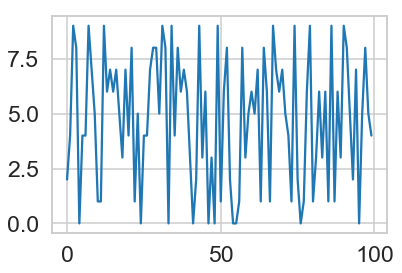

In [7]:
plt.plot(x)
plt.show()

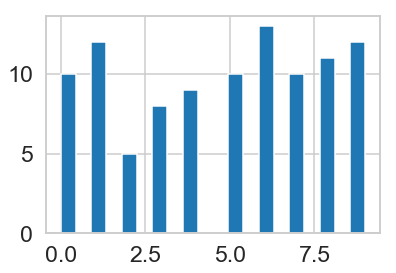

In [8]:
plt.hist(x, bins=20)
plt.show()

In [9]:
mean = np.mean(x)
var = np.var(x)
std = np.std(x)

("mean ", mean), ("variance ", var), ("std ", std)

(('mean ', 4.76), ('variance ', 8.6624), ('std ', 2.9431955422635445))

In [10]:
mean = np.mean(x_times_2)
var = np.var(x_times_2)
std = np.std(x_times_2)

("mean ", mean), ("variance ", var), ("std ", std)

(('mean ', 9.52), ('variance ', 34.6496), ('std ', 5.886391084527089))

In [11]:
mean = np.mean(x_plus_2)
var = np.var(x_plus_2)
std = np.std(x_plus_2)

("mean ", mean), ("variance ", var), ("std ", std)

(('mean ', 6.76), ('variance ', 8.6624), ('std ', 2.9431955422635445))

### Exercise

Consider the following card game with a well-shuffled deck of cards. If you draw a red card, you win nothing. If you get a spade, you win 5 dollars. For any club, you win 10, plus an extra \$ 20 for the ace of clubs.

(a) Create a probability model for the amount you win at this game. Also, find the expected winnings for a single game and the standard deviation of the winnings.

(b) What is the maximum amount you would be willing to pay to play this game? Explain your reasoning.

In [12]:
#your work here

### Solution

**Probability Model**

___
|For Each Outcome Of The Game$$(i)$$|Red Card|Spade|Clubs Without Ace |Ace of Clubs|Total|
|---:|:---:|---:|---:|---:|---:|
|Prize $$x_i$$|\$0|\$5|\$10|\$30||
|Probability$$P(X=x_i)$$|26/52|13/52|12/52|1/52||
|Expected Value $${x_i P(X=x_i)}$$|0\*26/52|5\*13/52|10\*12/52|30\*1/52|\$4.14|
|$${(x_i-\mu)^2 P(X=x_i)}$$|8.5475|0.1872|7.9390|12.8657|29.5396|
___

Average Expected Value E(X) or $\mu=E(X)=\sum_{i=1}^{k}{x_i P(X=x_i)}$ = \$4.14

Variance Var(X) or $\sigma^2= \sum_{i=1}^{k}{(x_i-\mu)^2 P(X=x_i)}$ = 29.5396

**(a)**
* Expected winnings for single game $\mu$ = \$4.14 
* Standard Deviation $\sigma = \sqrt{Var(X)}$ = \$5.44

**(b)**
* I would be willing to pay at most \$4.14 because it has to be less than the expected winnings for a single game. If I consider the standard deviation, it should be even less, depending on the probability of winning I would like to accept.

#### Calculations using Python code (this is not a simulation)

In [13]:
import numpy as np
P = [26.0/52, 13.0/52, 12.0/52, 1.0/52]
X = [0.0, 5.0, 10.0, 30.0]

m = 0
for i in range(len(X)):
    m = m + X[i]*P[i];
print ('Average Expected Value:',m)

V = np.array([0.0,0.0,0.0,0.0])
for i in range(len(X)):
    V[i] = (X[i] - m)**2*P[i];  
print ('(X[i] - m)**2*P[i]:', V)
print ('Variance: ', V.sum())
print ('STD:', V.sum()**(1/2.0))

Average Expected Value: 4.134615384615385
(X[i] - m)**2*P[i]: [ 8.54752219  0.18722263  7.93909308 12.8657331 ]
Variance:  29.53957100591716
STD: 5.435031831177915


### Exercise

The game of European roulette involves spinning a wheel with 37 slots: 18 red, 18 black, and 1 green. A ball is spun onto the wheel and will eventually land in a slot, where each slot has an equal chance of capturing the ball. Gamblers can place bets on red or black. If the ball lands on their colour, they double their money. If it lands on another colour, they lose their money.
* (a) Suppose you play roulette and bet \$3 on a single round. What is the expected value and standard deviation of your total winnings?
* (b) Suppose you bet \$1 in three different rounds. What is the expected value and standard deviation of your total winnings?
* (c) How do your answers to parts (a) and (b) compare? What does this say about the riskiness of the two games?

In [14]:
#your work here

### Solution

Assuming the player chooses the red colour
___
**Probability Model with \$3**

|For Each Outcome Of The Game$$(i)$$|Red|Black Or Green|Total|
|:---|---:|---:|---:|
|Prize$$x_i$$|\$3|\$-3||
|Probability$$P(X=x_i)$$|18/37|19/37||
|Expected Value $${x_i P(X=x_i)}$$|3\*18/37|-3\*19/37|\$-0.081|
|${(x_i-\mu)^2 P(X=x_i)}$|4.6182|4.3751|8.9934|

Average Expetcted Value E(X) or $\mu=E(X)=\sum_{i=1}^{k}{x_i P(X=x_i)}$ = \$-0.081

Variance Var(X) or $\sigma^2= \sum_{i=1}^{k}{(x_i-\mu)^2 P(X=x_i)}$ = 8.9934

Standard Deviation $\sigma$ = $3.00
___

**Probability Model with \$1**

|For Each Outcome Of The Game$$(i)$$|Red|Black Or Green|Total|
|:---|---:|---:|---:|
|Prize$$x_i$$|\$1|\$-1||
|Probability$$P(X=x_i)$$|18/37|19/37||
|Expected Value$${x_i P(X=x_i)}$$|1\*18/37|-1\*19/37|\$-0.027|
|$${(x_i-\mu)^2 P(X=x_i)}$$|0.5131|0.4861|0.9993|

Average Expected Value E(X) or $\mu=E(X)=\sum_{i=1}^{k}{x_i P(X=x_i)}$ = \$-0.027

Variance Var(X) or $\sigma^2= \sum_{i=1}^{k}{(x_i-\mu)^2 P(X=x_i)}$ = 0.9993

Standard Deviation $\sigma$ = $1.00
___

a) Expected winnings with a bet of \\$3 is equal to \\$-0.081; and the standard deviation is equal to \\$3.00

b) Total expected winnings for 3 games with a bet of \\$1.00 is 3 * (- \\$0.027) = - \\$0.081; and the standard deviation = \\$1 per game, which makes a total variance of \\$3.00 and the standard deviation is equal to \\$1.73 in total.

(c) In both scenarios, the expected winnings are the same but the standard deviation for the second strategy is lower, so it is less risky.

#### Calculations using Python code (this is not a simulation)

In [15]:
P = [18.0/37, 19.0/37]
X = [3.0, -3.0]

m = 0
for i in range(len(X)):
    m = m + X[i]*P[i];
print ('Average Expected Value:',m)

V = np.array([0.0,0.0])
for i in range(len(X)):
    V[i] = (X[i] - m)**2*P[i];  
print ('(X[i] - m)**2*P[i]:', V)
print ('Variance: ', V.sum())
print ('STD:', V.sum()**(1/2.0))

####################################
print ('\n', '3 Games with one dollar bet')
P = [18.0/37, 19.0/37]
X = [1.0, -1.0]

m = 0
for i in range(len(X)):
    m = m + X[i]*P[i];
print ('Average Expected Value:',m)

V = np.array([0.0,0.0])
for i in range(len(X)):
    V[i] = (X[i] - m)**2*P[i];  
print ('(X[i] - m)**2*P[i]:', V)
print ('Variance: ', V.sum())
print ('STD:', V.sum()**(1/2.0))
print ('3 one dollar games: 3*E(X):', 3*m)



Average Expected Value: -0.0810810810810807
(X[i] - m)**2*P[i]: [4.61824571 4.37518015]
Variance:  8.993425858290722
STD: 2.9989041095524747

 3 Games with one dollar bet
Average Expected Value: -0.027027027027026973
(X[i] - m)**2*P[i]: [0.51313841 0.48613113]
Variance:  0.9992695398100804
STD: 0.9996347031841584
3 one dollar games: 3*E(X): -0.08108108108108092


<a id='Uniform_distribution'></a>
## Uniform distribution

The **uniform distribution** is the most intuitive distribution for discrete random variables.  The outcome of rolling a die we saw in the previous module when we covered probabilities is the classic example of this type of distribution.  There are six possible outcomes: 1, 2, 3, 4, 5, and 6, and each value has the same probability: $\frac{1}{6}$. 

In the classical definition of proability, when the practitioner has no information about the probability of a set of possible outcomes, each one is assigned the same probability.

In general, a random variable follows a uniform distribution when the output of an event or experiment has a set of $n$ possible integers, and each integer has the same probability $\frac{1}{n}$.

$$
f(x) =     \left\{ \begin{array}{rcl}
         {\frac{1}{b-a+1}} & \mbox{for}
         & x = a,\mbox{ }a+1,\mbox{ }a+2,...,\mbox{ }b \\ 0  & \mbox{} & Otherwise \\
         \end{array}\right.
$$

Let's simulate and plot a uniform distribution:

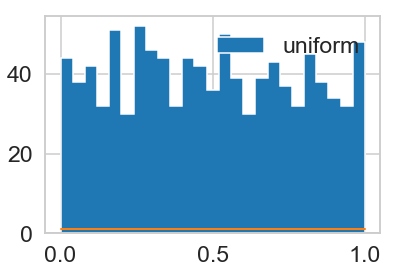

In [16]:
r=stats.uniform.rvs(size=1000)
ax = plt.hist(r, bins=25, histtype='stepfilled', label='uniform')
plt.legend(loc='best', frameon=False)
plt.plot(ax[1], np.ones_like(ax[1]), linewidth=2)
plt.show()

<a id='Bernoulli_distribution'></a>
## Bernoulli distribution

An experiment is called a **Bernoulli trial** when there is only one trial with two possible outcomes, usually labeled as success and failure.  Success is usually denoted by 1 and failure by 0.  Please note that “success” need not be something positive. This type of experiment is named after Jacob Bernoulli, who studied these types of experiments extensively in the late 1600s.

Every event that has two possible outcomes can be modelled with the Bernoulli distribution. For example: whether or not a customer is going to buy a product, an antibiotic is going to be effective to treat a specific disease, a specific citizen is going to vote, etc. Because the two possible outputs of a decision an individual makes is yes or no, the Bernoulli distribution is the basis of discrete choice models.

This mathematical inquiry of Bernoulli random variables can be extended even further. Because 0 and 1 are numerical outcomes, we can define the mean and standard deviation of a Bernoulli random variable.

Suppose we observe ten trials:  0 1 1 1 1 0 1 1 0 0

The sample proportion, $\widehat{p}$, is the sample mean of these observations:

$\widehat{p} = \frac{number \mbox{ }of \mbox{ }successes}{number \mbox{ }of \mbox{ }trials}=\frac{0+1+1+1+1+0+1+1+0+ 0}{10}=0.6$

The hat above the $p$ indicates that it is an estimator based on a sample. This convention and notation is followed by most textbooks and references.

If $X$ is a random variable that takes value 1 with probability of success $p$ and 0 with probability $q = (1 - p)$, then $X$ is a Bernoulli random variable with mean and standard deviation:

$$
\mu = p
$$

$$
\sigma = \sqrt{p \times (1-p)}
$$

Many decisions can be modeled as a binary choice, such as whether to vote for or against a proposal. If $p$ is the proportion of the voting population that favors the proposal, then the vote of a random individual is modeled by a Bernoulli distribution with probability $p$.

The probability density, or marginal likelihood function is:

$$p(y|p) = \begin{cases}
p & y = 1 \\
1 - p & y = 0
\end{cases}$$

**Example**

As we will see later, a Bernoulli experiment can be thought as a binomial with a sample size of one (one trial).

$y \sim \text{Bernoulli}(p) = \text{Binomial}(1, p)$

which is read as $y$ follows a Bernoulli distribution with probability $p$.

One way of simulating a Bernoulli experiment is by using this property.

For more information, please visit the documentation (SciPy Community, 2018a):

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.binomial.html#numpy.random.binomial


In [17]:
nobs = 100
theta = 0.3
Y = np.random.binomial(1, theta, nobs)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

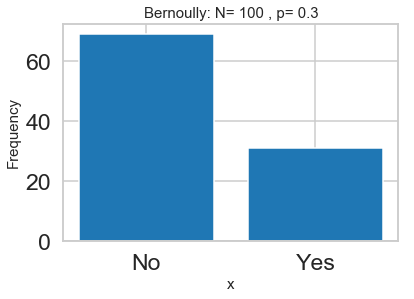

In [18]:
frequency = ((Y==0).sum(),(Y==1).sum())
plt.bar((0,1),frequency)
plt.xticks(np.arange(2), ('No','Yes'))
plt.title('Bernoully: N= 100 , p= 0.3' ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Frequency',fontsize=15);

We can also simulate a Bernoulli distribution by using:

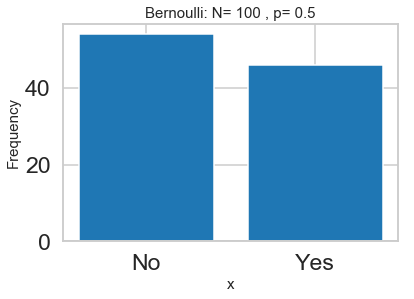

In [19]:
Y=stats.bernoulli.rvs(0.5, size=100)
frequency = ((Y==0).sum(),(Y==1).sum())
plt.bar((0,1),frequency)
plt.xticks(np.arange(2), ('No','Yes'))
plt.title('Bernoulli: N= 100 , p= 0.5' ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Frequency',fontsize=15);

<a id='Geometric_distribution'></a>
## Geometric distribution

In this distribution, there are one or more Bernoulli trials that are all failures except the last one, which is a success. In other words, you keep repeating what you are doing until the first success. Then you stop. 

For example, you are controlling bottles of a specific beverage comming out of a production line. If you know the probability that a bottle will be defective, the probability that the $n^{th}$ bottle out of the production line is defective can be calculated by the geometric distribution.

If the probability of a success in one trial is $p$ and the probability of a failure is $1 - p$, then the probability of finding the first success in the $n^{th}$ trial is given by

$(1 - p)^{n-1} \times p$

The mean (i.e., expected value) and variance $\sigma^{2}$, are given by

$$
\mu = \frac{1}{p}
$$

$$
\sigma ^{2} = \frac{1-p}{p^{2}}
$$

The notation for a geometric distribution is  $X \sim G(p)$, which is read as $X$ follows a geometric distribution with probability $p$.

**Example**

For further reference, please visit the documentation (SciPy Community, 2018b):
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.geometric.html#numpy.random.geometric
    

In [20]:
z = np.random.geometric(p=0.35, size=10000)
z

array([2, 1, 2, ..., 2, 1, 5])

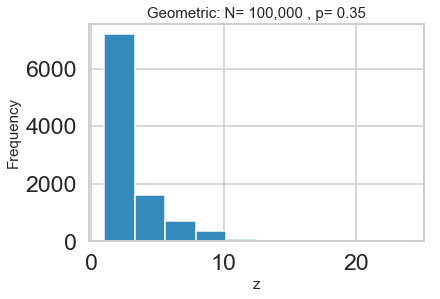

In [21]:
plt.hist(z, color='#348ABD')
plt.title('Geometric: N= 100,000 , p= 0.35' ,fontsize=15)
plt.xlabel('z',fontsize=15)
plt.ylabel('Frequency',fontsize=15);

<a id='Binomial_distribution'></a>
##  Binomial distribution

In many cases we repeat a Bernoulli trial many times.  There are three characteristics of a binomial experiment:

1.	There are a **fixed number of trials**. Think of trials as repetitions of an experiment. The letter $n$ denotes the number of trials. 
2.	There are only **two possible outcomes**, called "success" and "failure," for each trial. The letter $p$ denotes the probability of a success on one trial, and $q$ denotes the probability of a failure on one trial. $p + q = 1$. 
3.	The **$n$ trials are independent** and are repeated using identical conditions. Because the $n$ trials are independent, the outcome of one trial does not help in predicting the outcome of another trial. Another way of saying this is that for each individual trial, the probability, $p$, of a success and probability, $q$, of a failure remain the same. 

The outcomes of a binomial experiment fit a binomial probability distribution. The random variable $X$ equals the number of successes obtained in the $n$ independent trials.

For example, let's say you are calculating the probabibility that a certain number of voters in a city are going to vote for a candidate, where each voter follows a Bernoulli distribution with probability $p$. The number of voters for the specific candidate in the population will follow a binomial distribution where the number of trials is the number of inhabitants, $p$ is the probability of success or the probability that each voter will vote for a candidate, and the number of voters who vote for the candidate of interest is the number of successes. Note that we are not interested in who voted and who didn't; we are only interested in the total number of voters.

The binomial distribution is characterized as:

$$
p(x) =     \left\{ \begin{array}{rcl}
         {\left( \begin{array}{cc} n \\
           x \end{array} \right)p^{x}(1-p)^{n-x}} & \mbox{for}
         & x = 1,\mbox{ }2,\mbox{ }3,...,\mbox{ }n \\ 0  & \mbox{} & Otherwise \\
         \end{array}\right.
$$

The mean, $\mu$, and variance, $\sigma^{2}$, for the binomial probability distribution are:

$$
\mu = np
$$

$$
\sigma^{2}= npq
$$

The term $\left( \begin{array}{cc} n \\ x \end{array} \right)$ is called the combinatorial of $x$ in $n$ and it quantifes the number of combinations of $x$ objects from a set with $n$ objects. It is usually denoted as $_{n} C _{x}$ or $C_{n}^{x}$ or $C(n,x)$. The general formula of a combinatorial number is:

$$
C_{n}^{x} = \frac{n!}{(n-x)! x!}
$$

The first component of this equation is the number of ways to arrange the $x$ successes among the $n$ trials. The second component is the probability of any of the probable scenarios of $x$ successes in $n$ trials. For a short explanation on combinatorial numbers, refer to Hossein Arsham, 1994.

**Example**

There are many libraries that can simulate numbers that belong to a specified distribution.  Below are some examples.

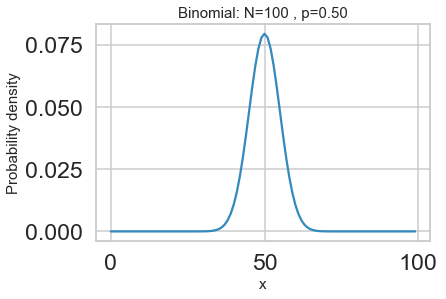

In [22]:
N = 100
p = 0.5
n = np.arange(0, 100)
y = stats.binom.pmf(n, N, p)


plt.plot(n,y,'r-', color='#348ABD')
plt.title('Binomial: N=%i , p=%.2f' % (N,p),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15);

### Example

The kicker for the Philedelphia Eagles makes 50 yard kicks 35% of the time. We can model that using a **Bernoulli distribution** where $y=1$ when the kick is good, and $y=0$ when the kick is no good.

The sample proportion is 0.341


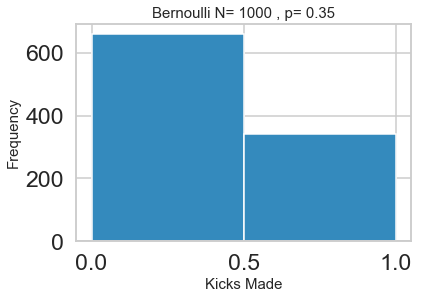

In [23]:
kick_prob = 0.35

num_tests = 1000
kick_values = []

for test in range(num_tests):
    kick_made = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
    kick_values.append(kick_made)


plt.hist(kick_values, bins=2,color='#348ABD')
plt.title('Bernoulli N= 1000 , p= 0.35' ,fontsize=15)
plt.xlabel('Kicks Made',fontsize=15)
plt.ylabel('Frequency',fontsize=15);

sample_proportion = sum(kick_values) / kick_values.__len__()
print("The sample proportion is %s" % sample_proportion)

What is the probability that the first kick will be successful? How about for subsequent kicks? The **geometric distribution** allows us to calculate how many trials we would have to undertake until we find a 'success'.

In [24]:
# Chance that the first kick is the first success
prob_1 = kick_prob
print(prob_1)

# Chance that the second kick is the first success
prob_2 = (1-kick_prob) * kick_prob
print(prob_2)

# Chance that the third kick is the first success
prob_3 = (1-kick_prob) * (1-kick_prob) * kick_prob
print(prob_3)

0.35
0.22749999999999998
0.147875


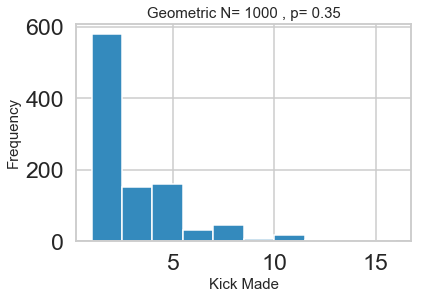

In [25]:
num_tests = 1000
kick_values = []

for test in range(num_tests):
    num_kicks = 0
    success = 0
    while (success == 0):
        success = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
        num_kicks += 1
    kick_values.append(num_kicks)
    
plt.hist(kick_values, color='#348ABD')
plt.title('Geometric N= 1000 , p= 0.35' ,fontsize=15)
plt.xlabel('Kick Made',fontsize=15)
plt.ylabel('Frequency',fontsize=15);    

Suppose the kicker is given five chances to make the field goal. What is the probability that exactly one kick will be a success? Two kicks?  This is an example of an application of the **binomial distribution**.

In [26]:
# Chance that he makes one kick
# This can happen like this: 
# M - M - M - M - H

prob_1 = (1-kick_prob) * (1-kick_prob) * (1-kick_prob) * (1-kick_prob) * (kick_prob)

# but it can also happen these ways:
# H - M - M - M - M
# M - H - M - M - M
# M - M - H - M - M
# M - M - M - H - M
# M - M - M - M - H

# So:
prob_1 = prob_1 * 5
print(prob_1)

# How about for exactly two kicks:
# H - H - M - M - M
# H - M - H - M - M
# H - M - M - H - M
# H - M - M - M - H
# M - H - H - M - M
# M - H - M - H - M
# M - H - M - M - H
# M - M - H - H - M
# M - M - H - M - H
# M - M - M - H - H
prob_2 = ((kick_prob) * (kick_prob) * (1-kick_prob) * (1-kick_prob) * (1-kick_prob)) * 10
print(prob_2)

# Finally, for exactly three kicks:
# H - H - H - M - M
# H - H - M - H - M
# H - H - M - M - H
# H - M - H - H - M
# H - M - M - H - H
# H - M - M - H - H
# M - H - H - H - M
# M - H - H - M - H
# M - H - M - H - H
# M - M - H - H - H
prob_3 = ((kick_prob) * (kick_prob) * (kick_prob) * (1-kick_prob) * (1-kick_prob)) * 10
print(prob_3)

0.3123859375000001
0.336415625
0.18114687499999998


Again, we'll check with a simulation:

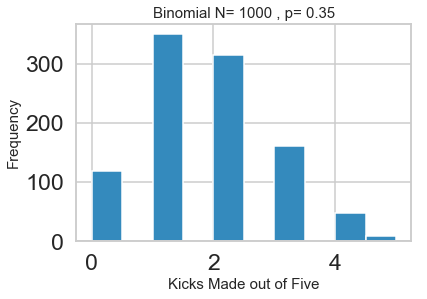

In [27]:
num_tests = 1000
kick_values = []

for test in range(num_tests):
    # Kick 5 times
    kick_1 = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
    kick_2 = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
    kick_3 = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
    kick_4 = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
    kick_5 = np.random.choice([1, 0], p=[kick_prob, (1-kick_prob)])
    
    # How many kicks did we get?
    kicks_made = kick_1 + kick_2 + kick_3 + kick_4 + kick_5
    
    # Put the number of kicks made into our list
    kick_values.append(kicks_made)
    
    
plt.hist(kick_values, color='#348ABD')
plt.title('Binomial N= 1000 , p= 0.35' ,fontsize=15)
plt.xlabel('Kicks Made out of Five',fontsize=15)
plt.ylabel('Frequency',fontsize=15);    

<a id='Poisson_distribution'></a>
## Poisson distribution

Another popular distribution is the **Poisson distribution**, which gives the probability of a number of events occurring in a fixed interval of **time** or **space** if these events happen with a known average rate and events are independent from each other. 

The Poisson distribution may be used to approximate the binomial if the probability of success is "small" (such as 0.01) and the number of trials is "large" (such as 1,000).

The random variable $X$ is the number of occurrences in the interval of interest, $n$ is the number of trials, and $p$ is the probability of a "success". 

Examples:

* A book editor might be interested in the number of words spelled incorrectly in a particular book. It might be that, on average, there are five words spelled incorrectly in 100 pages. The interval is the 100 pages. 

* The number of cars arriving at a service station in 1 hour. (The interval of time is 1 hour.) 

* The number of flaws in a bolt of cloth. (The specific region is a bolt of cloth.) 

* The number of accidents in 1 day on a particular stretch of highway. (The interval is defined by both time, 1 day, and space, the particular stretch of highway)

A Poisson experiment is characterized by the following properties: 
1. The number of successes that occur in any interval is independent of the number of successes that occur in any other interval
2. The probability of a success in an interval is the same for all equal-sized intervals
3. The probability of a success in an interval is proportional to the size of the interval
4. The probability of more than one success in an interval approaches 0 as the interval becomes smaller

The Poisson distribution is characterized as:

$$
p(x) =     \left\{ \begin{array}{rcl}
          \frac{e^{-\lambda} \lambda^{x}}{x!}& \mbox{for}
         & x = 1,\mbox{ }2,\mbox{ }3,... \\ 0  & \mbox{} & Otherwise \\
         \end{array}\right.
$$

where $\lambda$ is the average rate of occurence and $x$ is the number of events observed.

The notation for a Poisson distribution is  $X \sim P(\lambda)$; this is read as $X$ follows a Poisson distribution with average $\lambda$.

The mean, $\mu$, and variance, $\sigma^{2}$, for the Poisson probability distribution are:

$$
\mu = \lambda
$$

$$
\sigma^{2}= \lambda
$$



**Example**

Let's illustrate an application of the Poisson distribution by solving one exercise from the main reference textbook.

Stenographer’s typos, Part I. A very skilled court stenographer makes one typographical error (typo) per hour on average.

(a) What probability distribution is most appropriate for calculating the probability of a given number of typos this stenographer makes in an hour?

(b) What are the mean and the standard deviation of the number of typos this stenographer makes?

(c) Would it be considered unusual if this stenographer made 4 typos in a given hour?

(d) Calculate the probability that this stenographer makes at most 2 typos in a given hour.

a) Poisson Distribution: this distribution can assess the number of events that will occur in a short unit of TIME for a fixed population, given that the data points are independent

b) Mean = $1$; SD = $\sqrt{1}=1$

c) Where the probability of $k$ events, assuming a Poisson distribution, equals $(\lambda^k)*\frac{(e^{-\lambda})}{k!}$, and $\lambda$ (rate) $= 1$, $k=4$

The probability of 4 typos in an hour is:

In [28]:
(1**4)*np.exp(1)**(-1)/np.math.factorial(4)

0.015328310048810098

Per the above, 4 typos in one hour would be unusual.

d) We must add the probabilities of 0, 1 and 2 typos per hour:

In [31]:
typo0=(1**0)*np.exp(-1)/np.math.factorial(0)
typo1=(1**1)*np.exp(-1)/np.math.factorial(1)
typo2=(1**2)*np.exp(-1)/np.math.factorial(2)
print("The probability the stenographer makes at most 2 typos in a given hour is:")
typo0+typo1+typo2

The probability the stenographer makes at most 2 typos in a given hour is:


0.9196986029286058

The example above can be solved using built-in functions.

In [32]:
stats.poisson.pmf(4,1)

0.015328310048810101

In [33]:
stats.poisson.cdf(2,1)

0.9196986029286058

In general, a Poission distribution can be simulated as follows:

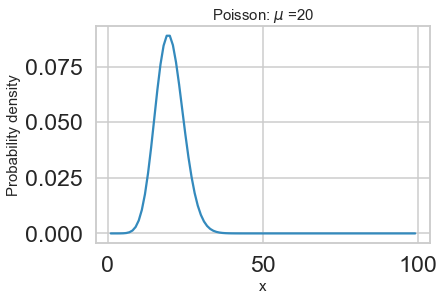

In [39]:
u=20
n=range(1, 100)
y=stats.poisson.pmf(n,u)

plt.plot(n,y,'r-', color='#348ABD')
plt.title('Poisson: $\mu$ =%i' % u,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15);

**End of Part 1**

This notebook makes up one part of this module. Now that you have completed this part, please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

## References

SciPy Community (2018a). numpy.random.binomial. Retrieved from https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.binomial.html#numpy.random.binomial

SciPy Community (2018b). numpy.random.geometric. Retrieved from
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.geometric.html#numpy.random.geometric
